<a href="https://colab.research.google.com/github/Pratere/AstronomyLabs/blob/master/HR_Diagrams/HR_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sloan Digital Sky Survey HR Diagram Lab

This Lab was translated to a Python Notebook from Sloan Digital Sky Survey, the original lab can be accessed [here](http://cas.sdss.org/dr5/en/proj/advanced/hr/default.asp).

### Let's import some packages
Well use these throughout 

In [9]:
# Load packages we will need
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from numpy import log

# Set some preferences for plots
%matplotlib inline
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
plt.rcParams.update(params)
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

## The Hertzsprung-Russell Diagram
For centuries, astronomers wondered about the life cycles of stars. Do stars burn forever, or do they have lifetimes? How are they born, and how do they die? How do they change as they go through their lives?

However, these questions proved difficult to answer because stars live so long. Today, we know that even a relatively short-lived star burns for a few million years. Stars like our sun last about 10 billion years, and some stars burn even longer. Compared to the average human lifespan of about 100 years, stars seem to live forever. A human could never watch a star go through its complete life cycle.

So how can humans learn about the life cycles of stars? By looking at a large number of stars, we can see them in various stages of development. We see young hot stars, old cool stars, and stars that have ended their lives and left empty husks. If we look at enough stars of various ages, we can put together a complete picture of stellar evolution.

At the beginning of the 1900s, scientists closed in on a picture of stellar evolution. Physicists worked out the theory of nuclear fusion and realized that fusion provided enough energy to power stars. They realized that eventually, stars would run out of fuel for fusion and would burn out. So all stars would eventually die. But what would happen to stars during their lives?

The first clue came soon after astronomers on two continents. In 1911, Ejnar Hertzsprung, a Danish astronomer studying at the University of Leiden in the Netherlands, plotted the luminosities of stars against their colors. Luminosity is measure of how the total energy a star gives off. The color, as you may have learned in the Color project, tells you the star's surface temperature. So, essentially, Hertzsprung graphed how much energy a star gave off as a function of the star's temperature. He noticed some distinct and unexpected patterns.

In 1913, Henry Norris Russell of Princeton University plotted the luminosities of stars against their spectral types. Spectral types are also a measurement of temperature (see the Spectral Types project for more information), so essentially, Russell made the same diagram that Hertzsprung made. The diagram became known as the Hertzsprung-Russell (or "H-R") diagram. By studying H-R diagrams, later astronomers figured out the life cycles of stars.

In this project, you will make your own Hertzsprung-Russell diagrams. You will learn what the various points represent, and you will also learn some of the difficulties in making H-R diagrams.


## Making an H-R Diagram
To make an H-R diagram, you must look at many stars. But for each star, you need to measure only two quantities: luminosity and temperature. You can't directly measure either quantity. But astronomers have developed several clever ways to find stellar luminosities and temperatures from quantities that we can directly observe.

## Luminosity
The most difficult part of making an H-R diagram is finding the luminosities of stars. The animation to the right lets you control the luminosity of the sample star; drag the slider to the right to make the star more luminous.

Since we can't go to stars, all we can know about them is what we can see from Earth. But from Earth, we don't know how bright a star really is; we only know how bright it looks to us.

Two stars with the same luminosity at different distances will look different; a nearby star will look brighter than an identical star farther away. Astronomers measure the apparent brightnesses of stars with a number called apparent magnitude. In the magnitude scale, a lower number means a brighter object (see the Color project for more information). If two stars have the same luminosity, the star that is closer to us will appear brighter and have a lower apparent magnitude. A more distant star will appear dimmer and will have a higher apparent magnitude. Later in this project, you will learn how to calculate the distances to stars, and how to use these distances to find the stars' luminosities.

## Temperature
Astronomers have several ways to find the temperatures of stars, but the simplest way is to look at the stars' colors. In astronomy, a star's color is defined as the difference between its magnitudes as seen through two different filters - telescope attachments that block out all light except light with a specific wavelength. It doesn't matter which two filters you use - you should calculate the same temperature (to learn how to calculate temperature from color, see the Color project). Traditionally, astronomers have taken images through blue, yellow, and red filters denoted by the letters b, v, and r. The animation at the right shows what a heating and cooling pan might look like through b and v filters.

If you subtract a star's v magnitude from its b magnitude, you get a color called b-v. Stars with lower b-v colors have higher temperatures, so you can use b-v color to make an H-R diagram.

The SDSS does not use the traditional b, v, and r filters; instead, it uses five filters that see ultraviolet, green, red, and two wavelengths of infrared light. These five filters are denoted u, g, r, i, and z. To make your H-R diagram, use the green and red filters, which both fall in the visible part of the spectrum. From the magnitudes of stars in these filters, you can calculate the color g-r.

## A Simple H-R Diagram

Once you know the luminosity and temperature (or color) of a star, you can plot the star as a point on the H-R diagram. Plot the luminosity on the y-axis with brighter stars going toward the top. Since brighter stars have lower magnitudes, if you choose to plot magnitude on the y-axis, the values will decrease as you go up! That's OK - just remember that the luminosity of the star is increasing.

Plot temperature on the x-axis. However, since we can't know a star's real temperature, you should instead plot color (either the traditional b-v or SDSS's g-r) on the x-axis. Traditionally, hotter stars have been placed at the left of the chart and cooler stars to the right. Even though the temperature decreases as you move the right, the b-v and g-r values will increase. So you should make your H-R diagram with b-v or g-r increasing to the right.

The first H-R diagram you should try is a diagram for the brightest stars in the sky. The table below shows the 26 brightest stars in the sky. Instead of plotting their luminosities (which are so large that they're hard to visualize), plot the stars' absolute magnitudes. Absolute magnitude is defined as the magnitude that a star would have if you saw it from a distance of 10 parsecs (about 32 light-years). Stars with higher luminosities put out more light, so they are brighter - they have lower apparent magnitudes. Stars with lower luminosities put out less light, so they are dimmer - they have higher absolute magnitudes.

The table below shows the 26 brightest stars, giving their names, apparent magnitudes, absolute magnitudes, and b-v colors.

In [0]:
# Load the 26 brightest star dataset
brightest26 = pd.read_csv('https://raw.githubusercontent.com/Pratere/AstronomyLabs/master/HR_Diagrams/brightest26.csv')

In [3]:
# Display dataset
brightest26

,Star Name,Apparent Magnitude,Absolute Magnitude,b-v
0,Sun,-26.80,4.8,0.63
1,Sirius,-1.46,1.4,0.00
2,Canopus,-0.72,-2.5,0.15
3,Arcturus,-0.04,0.2,1.23
4,Alpha Centauri,-0.01,4.4,0.71
5,Vega,0.00,0.6,0.00
6,Capella,0.08,0.4,0.08
7,Rigel,0.12,-8.1,-0.03
8,Procyon,0.38,2.6,0.42
9,Betelgeuse,0.41,-7.2,1.85


### Exercise 1.
Lets make an H-R diagram for the brightest stars by graphing b-v and absolute magnitude for the 26 stars above.

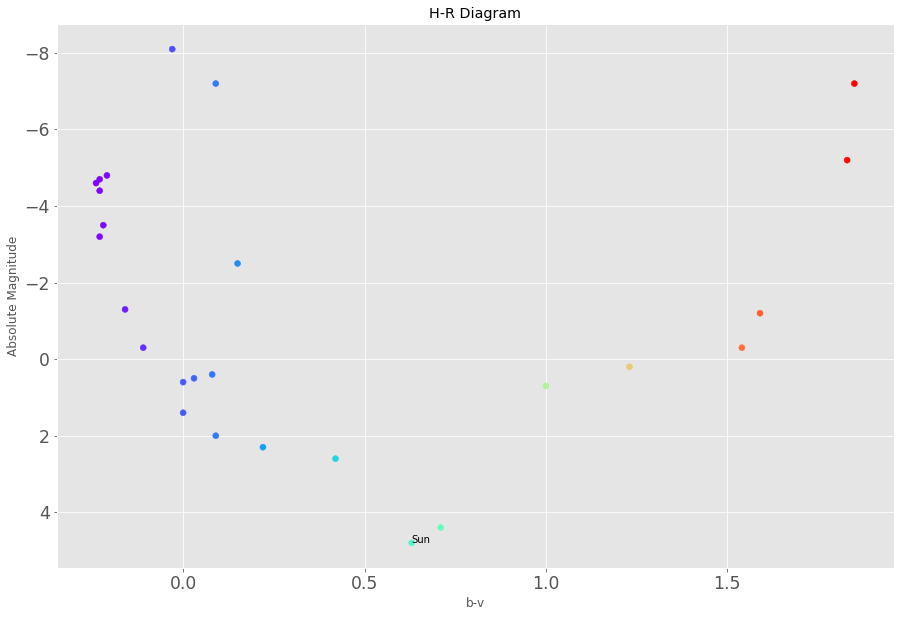

In [5]:
fig, ax = plt.subplots()

# Delete the # on the line below to add box 
#ax.add_patch(Rectangle((-0.25, -6), 0.75, 10, ec='red', fill=False))

ax.scatter(brightest26['b-v'], brightest26['Absolute Magnitude'], c=brightest26['b-v'], cmap='rainbow')

#for i in range(len(brightest26['Absolute Magnitude'])):
plt.annotate(brightest26['Star Name'].iloc[0], (brightest26['b-v'].iloc[0], brightest26['Absolute Magnitude'].iloc[0]))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

ax.set_xlabel('b-v')
ax.set_ylabel('Absolute Magnitude')

ax.set_title('H-R Diagram')

plt.show()

Question 1) Do you see any groups of stars that appear to have something in common? Discuss it then, go up to the cell that made the graph and delete the "#" on the $4^{th}$ line.

Question 2) The stars in the upper right of the diagram are very bright but are also very cool. If the stars are cool, why do you think they are so bright?

Question 3) Where does our sun plot on this diagram? Is it hotter or cooler than average? Does it emit more or less light than average?

Question 4) Do you think your diagram constitutes a good random sample of stars? Why or why not?

### A More Complete H-R Diagram

So, do you think the sample was biased? If so, you are right. When you look at the brightest stars in the night sky, you tend to see the largest, hottest, and most luminous stars. Of the 26 brightest stars, nearly all are much larger and brighter than average.

Your goal should be to make a complete H-R diagram - one that will show all the major types of stars, and roughly how many stars of each type the universe contains. Making an H-R diagram with the brightest stars didn't work, because the diagram contained too many bright stars. You need to try another approach.

Next, you should make an H-R diagram using the nearest stars rather than the brightest. This diagram will tell us what the stars closest to the Sun are like.

Question 5. What is the advantage of looking at the nearest stars rather than the brightest? Do you think the diagram for the nearest stars will look different from the diagram for the brightest stars? If so, how?

## An H-R Diagram for the Nearest Stars

In this exercise, you will make a slightly different type of H-R diagram. Instead of graphing absolute magnitude vs. b-v color, you will graph absolute magnitude vs. spectral type. Looking at a star's spectral type - defined by the peaks and valleys in its spectrum - is an another way of finding the star's temperature. See the Spectral Types project for more information.

To use the spectral types classification in Excel, you will need to convert the spectral type's letter-number designation into a number. The temperature order of spectral types, from hottest to coolest, is OBAFGKM. There are also spectral subtypes 0 - 9 for each type. Let spectral type O be the digits 0 - 9, B be 10 - 19, A be 20 - 29, and so on. For example, if you had a G2 star (like our Sun) you would enter 42. 

Exercise 2. Let's make an H-R diagram for the closest stars. Below is the data for the nearest 26 stars.

In [0]:
nearest26 = pd.read_csv('https://raw.githubusercontent.com/Pratere/AstronomyLabs/master/HR_Diagrams/reduced_nearest26.csv')

In [18]:
nearest26

,Star Name,Apparent Magnitude,Absolute Magnitude,Spectral Type,b-v
0,Sun,-26.72,4.8,42.0,0.630000
1,Proxima Centauri,11.05,15.5,65.5,1.959464
2,Rigil Kentaurus,-0.01,4.4,42.0,0.652114
3,Alpha Cen B,1.33,5.7,41.0,0.610774
4,Barnard's Star,9.54,13.2,63.8,1.843270
5,Wolf 359,13.53,16.7,65.8,1.980318
6,BD +36 2146,7.50,10.5,62.1,1.730448
7,Luyten 726-8A,12.52,15.5,65.6,1.966404
8,Luyten 726-8B,13.02,16.0,65.6,1.966404
9,Sirius A,-1.46,1.4,21.0,0.028995


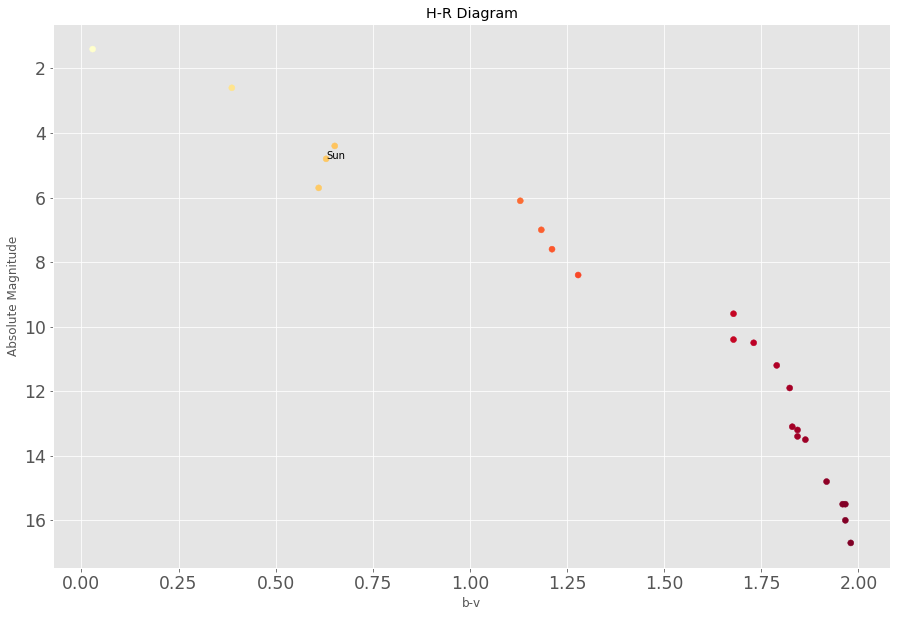

In [19]:
fig, ax = plt.subplots()

ax.scatter(nearest26['b-v'], nearest26['Absolute Magnitude'], c=nearest26['b-v'], cmap='YlOrRd')

#for i in range(len(nearest26['Absolute Magn0tude'])):
plt.annotate(nearest26['Star Name'].iloc[0], (nearest26['b-v'].iloc[0], nearest26['Absolute Magnitude'].iloc[0]))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

ax.set_xlabel('b-v')
ax.set_ylabel('Absolute Magnitude')

ax.set_title('H-R Diagram')

plt.show()

Question 6) How does this diagram differ from the diagram for the brightest stars?

Question 7) How does our Sun compare to the other stars in our neighborhood?

The H-R diagram of the nearest stars looks different from the H-R diagram of the brightest stars. Most nearby stars are small and faint, while most of the brightest stars are large and bright. What would happen if you combined the two types of stars into a single H-R diagram?

## A Schematic H-R Diagram

If you could look at all the stars within a large region of space - the large, bright stars you saw in Exercise 1 and the small, faint stars you saw in Exercise 2 - you could get an H-R diagram with a representative sample of stars. The H-R diagram you would make would look like the schematic diagram below:

[Link to H-R Diagram](https://github.com/Pratere/AstronomyLabs/blob/master/HR_Diagrams/hr_diagram.png)

The schematic H-R diagram shows four groups of stars. The narrow band across the center is the "main sequence" of stars, which contains about 90% of stars. Main sequence stars are normal hydrogen-burning stars like our Sun. A star's position along the main sequence is determined entirely by its mass. Bigger stars are hotter and brighter - class O stars can have 60-100 times the Sun's mass. Smaller stars are cooler and dimmer - class M stars can have one-tenth the Sun's mass. When you made the H-R diagram of the nearest stars, you saw only main sequence stars.

The stars above and to the right of the main sequence are giant and supergiant stars - older stars that have run out of hydrogen, and now burn heavier elements. When you made the H-R diagram of the brightest stars, you saw mostly giant and supergiant stars.

The stars below and to the left of the main sequence are white dwarfs - giant stars that ran out of all their nuclear fuel and collapsed. They glow hot because of the energy left over from their collapse. You did not see any white dwarfs in your two H-R diagrams because they are very faint and hard to detect. The nearest white dwarf is Sirius B, which orbits the bright star Sirius. Sirius B is about 8.6 light-years away and has an apparent magnitude of about 8.5.

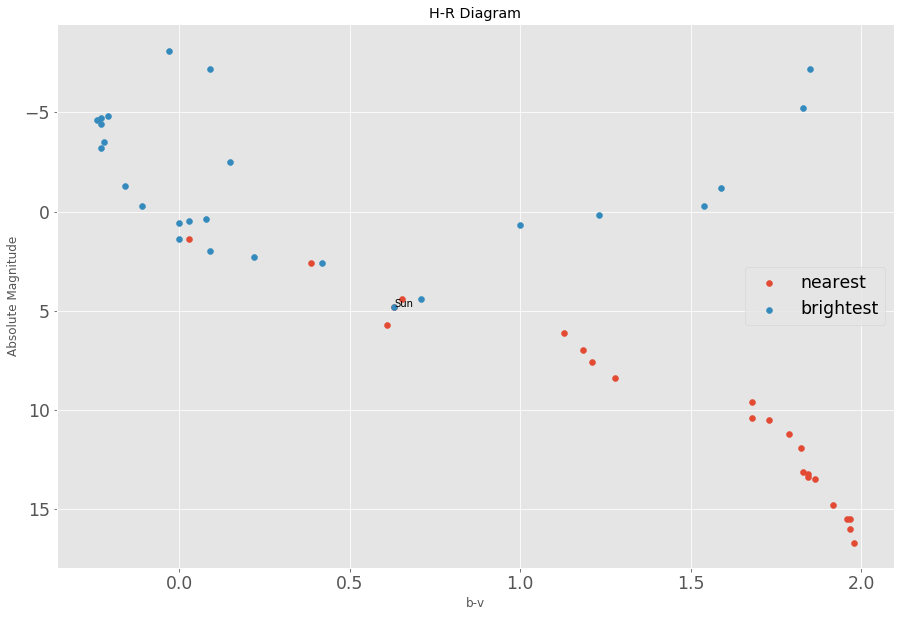

In [12]:
fig, ax = plt.subplots()

ax.scatter(nearest26['b-v'], nearest26['Absolute Magnitude'], marker='o', label='nearest')

#for i in range(len(nearest26['Absolute Magnitude'])):
#    plt.annotate(nearest26['Star Name'].iloc[i], (nearest26['b-v'].iloc[i], nearest26['Absolute Magnitude'].iloc[i]))

ax.scatter(brightest26['b-v'], brightest26['Absolute Magnitude'], marker='o', label='brightest')

#for i in range(len(brightest26['Absolute Magnitude'])):
plt.annotate(brightest26['Star Name'].iloc[0], (brightest26['b-v'].iloc[0], brightest26['Absolute Magnitude'].iloc[0]))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

ax.set_xlabel('b-v')
ax.set_ylabel('Absolute Magnitude')

ax.set_title('H-R Diagram')

ax.legend(loc='center right')

plt.show()

## Extending the H-R Diagram to More Stars

The H-R diagrams you have made so far cover only stars in the area very close to our Sun - a small part of the whole galaxy. In fact, the volume of space you looked at to make your H-R diagrams of the nearest stars is less than 0.0001% of the volume of our galaxy. Do stars in the rest of the galaxy fall into the same groups as stars close to our Sun? To find out, you need to extend your H-R diagram to include more distant stars.

There is a problem, however. To make an H-R diagram, you need to know the star's luminosity (or absolute magnitude). To find a star's luminosity, you need to know its distance from Earth. SDSS records the apparent magnitudes of stars, but not their distances. If SDSS does not find distances to stars, how can you make an H-R diagram? You will need to collaborate with another project.

## Scientific Collaboration

Collaboration is one of the most important aspects of science. Another group may have data that you would find useful but cannot obtain using your equipment. In this case, you need to know distances to stars.

To find the distances, you can "collaborate" with the European Space Agency (ESA). In 1989, ESA launched a satellite called Hipparcos. It made extremely accurate measurements of the brightnesses of and distances to 118,000 stars, and measured brightnesses of and distances to about 2.5 million stars with a slightly lower level of precision.

Hipparcos measured stars down to 12th magnitude. The SDSS uses digital cameras; if you take a picture of a very bright object, the cameras' CCD chips will become saturated and you will not get a good image. For the SDSS telescope, very bright means about 12th magnitude. So the SDSS can't give any information about stars brighter than 12th magnitude. Notice that the SDSS can't observe stars that Hipparcos measured, and Hipparcos can't observe stars that the SDSS measures! The SDSS and Hipparcos make a perfect collaboration - each data set has strengths that make up for the other set's weaknesses.

Over the next few pages, you will make an H-R diagram of a famous star cluster using data from the Hipparcos satellite. After that, you will use what you learned to make an H-R diagram of a fainter, more distant star cluster using SDSS data. 

## Hipparcos Satellite Data

The Hipparcos satellite finds the distances to stars using a technique called parallax.

You have probably seen parallax before. Hold your thumb at arms length. Close one eye and look at your thumb. Now switch which eye is closed. You will notice your thumb appears to "jump" relative to the background. Your thumb appears to jump because you are looking at it from a slightly different angle. The distance between your eyes is called the "baseline" and the angular distance (in degrees or radians) that your thumb appears to jump is called the "parallax angle." The length of the baseline determines the smallest parallax angle you can resolve; longer baselines can resolve smaller angles.

Stars are extremely far away, so we need a very large baseline to determine parallax angles. In fact, the baseline needs to be substantially larger than the radius of the Earth. Astronomers use the Earth's entire orbit to get a large enough baseline. Astronomers observe a star on one night and then again about six months later, when Earth has moved halfway around the sun. Using this technique, astronomers can find parallax angles with a baseline of 186 million miles!

Even with such a large baseline, the parallax angles of stars are very small. Proxima Centauri, the closest star, has a parallax angle of 0.772 arc seconds (each degree is divided into 60 arc minutes and each arc minute is divided into 60 arc seconds. Therefore, 1 arc second is 1/3600 of a degree!) Due to atmospheric blurring, you can measure parallax angles down to about 0.01 arc seconds from the surface of the Earth.

The Hipparcos satellite, which makes its measurements from Earth orbit, measured the parallax distances to about 120,000 stars with an accuracy of 0.001 arc seconds, and about 2.5 million stars with a lesser degree of accuracy. This gives accurate distances to stars out to several hundred light-years.

Much like SDSS data, all Hipparcos data are available online. On the next page, you will use Hipparcos data to help make an H-R diagram. You will calculate the distances to several stars from their parallax angles. You will then use this distance, along with each star's visual magnitude, to calculate its absolute magnitude.

## Calculating Distance from Parallax Angles

The parallax angle is given in units of arcseconds. The distance to the star is given by the formula

d = 1/p,

where d is the distance to the star in parsecs (1 pc = 3.26 light-years) and p is the parallax angle in arc seconds.

Let's practice. You can access a tool that shows an image of the sky with all Hipparcos data [here](http://www.rssd.esa.int/SA-general/Projects/Hipparcos/skyplot.html) (it will open in a new window). Read the directions on the page, then start the Java applet. Enter the coordinates given for Sirius and click on View. The applet will draw the region of sky around Sirius. The blue points are in the Hipparcos catalog and the Tycho catalog (objects in the Hipparcos catalog were measured with greater precision) and the white points are only in the Tycho catalog. The larger the circle, the brighter the star. Click on Sirius, the largest star in the middle, then click Get Info. Another window will open with a lot of information. You are most interested in line H11, Trigonometric parallax.

For Sirius, the parallax is 379.21 milliarcseconds. Plugging into our formula gives a distance of 2.637 parsecs. Converting to light-years gives a distance of 8.6 light-years. 

Exercise 3) Use the [Hipparcos data](https://www.cosmos.esa.int/) to find the distances to the following stars, given by RA and Dec. They are all in the same field you just called up to find Sirius. Record the Visual magnitudes of the stars as well. You will need them later.

In [3]:
raDec_data = pd.DataFrame(columns=['RA', 'Dec', 'Visual Magnitude', 'Parallax', 'Distance'])

raDec_data['RA'] = [100.521, 99.648, 100.392, 102.203]
raDec_data['Dec'] = [-15.209, -16.874, -17.534, -16.211]
raDec_data['Visual Magnitude'] = [0, 0, 0, 0]
raDec_data['Parallax'] = [0, 0, 0, 0]
raDec_data['Distance'] = [0, 0, 0, 0]

raDec_data

,RA,Dec,Visual Magnitude,Parallax,Distance
0,100.521,-15.209,0,0,0
1,99.648,-16.874,0,0,0
2,100.392,-17.534,0,0,0
3,102.203,-16.211,0,0,0


In [5]:
from ipywidgets import widgets
from IPython.display import display


rowSelect = widgets.IntText(value=0,
                           description="rowSelect",
                           disabled=False)
visualMag = widgets.Text(value='0.0',
                              description="Visual Magnitude",
                              disabled=False)
parallax = widgets.Text(value='0.0',
                            description="Parallax",
                            disabled=False)
distance = widgets.Text(value='0.0',
                            description="Distance",
                            disabled=False)
submit = widgets.Button(description="Submit",
                       disabled=False,
                       tooltip='Click to submit')

def handle_submit(sender):
    raDec_data[sender.description].iloc[rowSelect.value] = float(sender.value)

def handle_click(sender):
    raDec_data[visualMag.description].iloc[rowSelect.value] = float(visualMag.value)
    raDec_data[parallax.description].iloc[rowSelect.value] = float(parallax.value)
    raDec_data[distance.description].iloc[rowSelect.value] = float(distance.value)
    
visualMag.on_submit(handle_submit)
parallax.on_submit(handle_submit)
distance.on_submit(handle_submit)
submit.on_click(handle_click)

In [10]:
display(rowSelect)
display(visualMag)
display(parallax)
display(distance)
display(submit)

IntText(value=0, description='rowSelect')

Text(value='50.9', description='Visual Magnitude')

Text(value='4', description='Parallax')

Text(value='8', description='Distance')

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

In [12]:
raDec_data

,RA,Dec,Visual Magnitude,Parallax,Distance
0,100.521,-15.209,50.9,4.0,8.0
1,99.648,-16.874,0.0,0.0,0.0
2,100.392,-17.534,50.9,4.0,8.0
3,102.203,-16.211,0.0,0.0,0.0


Now that you know these stars' apparent visual magnitudes and distances, you can find their absolute magnitudes. Absolute magnitude is defined as the magnitude a star would appear to have if it were 10 parsecs away from us. Our Sun's absolute magnitude is 4.84 (compared to its visible magnitude of -26.2!).

The relationship between a star's apparent magnitude and absolute magnitude is given by the expression

M = m - 5 log d + 5,

where m is the star's apparent magnitude, M is the star's absolute magnitude, and d is the distance to the star in parsecs.

Let's take the star Sirius again. It has a visual magnitude of -1.44 and it is 2.637 parsecs away. Therefore, its absolute magnitude is

M = -1.44 - 5 log (2.637) + 5 = 1.45.

Exercise 4: Use the visual magnitudes and distances you found earlier to find the absolute magnitudes of these stars.

In [22]:
def absoluteMagnitude(m, d):
  absoluteMag =            # Plug in the equation for absolute magnitude here
  return absoluteMag

raDec_data['Absolute Magnitude'] = absoluteMagnitude(raDec_data['Visual Magnitude'], raDec_data['Distance'])

raDec_data

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,RA,Dec,Visual Magnitude,Parallax,Distance,Absolute Magnitude
0,100.521,-15.209,0,0,0,inf
1,99.648,-16.874,0,0,0,inf
2,100.392,-17.534,0,0,0,inf
3,102.203,-16.211,0,0,0,inf


Now you are ready to make an H-R diagram

Exercise 5) You will be making an H-R diagram using data from the [Sky Plot tool](https://www.cosmos.esa.int/) you used earlier. Search around the Pleiades, a famous star cluster in the Northern Spring sky. Enter the appropriate coordinates and get your data. You will need the visual magnitude, parallax, and b-v color for each star. Get the data for many stars around the Pleiades. Construct an H-R diagram for the stars near the Pleiades

Question 8. Based on their distances, which stars do you think belong to the Pleiades? Which stars just happen to be in the same part of the sky but are at different distances?

Question 9. Are most of the stars in the Pleiades main sequence stars, red giants, or white dwarfs?

You can use this information, in conjunction with the temperature of the star, to calculate the star's radius. To learn how to calculate the radius of a star, click [here](http://cas.sdss.org/dr5/en/proj/advanced/hr/radius1.asp).

One of the most important assumptions in science is that the laws of nature are the same everywhere in the universe. Your last two H-R diagrams suggest that this should be true - stars in the Pleiades show the same relationships as stars near the Sun.

But even including the Pleiades gives you H-R diagrams for stars only out to a distance of a few hundred light years. How can we look at stars farther away and see if they exhibit the same behavior? We cannot accurately measure distances to very distant stars because their parallax angles get too small.

When you looked at the Pleiades, you saw a star cluster. When you found the distance to each star, you found that they were all about the same. This finding makes sense: since the stars were together in a cluster, they should all be at about the same distance from Earth. The more distant the cluster, the safer it is to assume that all the stars are at the same distance.

If you assume that all the stars in a cluster are at the same distance, you can assume that each star's observed apparent magnitude corresponds to its luminosity. In other words, you can make an H-R diagram using apparent magnitude instead of absolute magnitude. If you make an H-R diagram for a cluster, you don't have to know the actual distance to the cluster. Therefore, you can make H-R diagrams for star clusters too far away to find distances with parallax. Star clusters are a powerful tool for making H-R diagrams.

## H-R Diagram of a Globular Cluster

Clusters like the Pleiades lie deep within our galaxy. The SDSS, on the other hand, looks primarily above and below the plane of the galaxy. This view is great for seeing distant galaxies and quasars, but it is not very good for seeing star clusters.

All of the clusters seen by the SDSS are globular clusters, thick clusters containing millions of stars that lie just above and just below the plan of our galaxy. The two clusters we'll work with were both found by the Palomar Sky Survey in the 1950's, hence the names Pal 3 and Pal 5. Their coordinates are given below.

| Name  |    RA    |   Dec   |   Radius   |
|-------|:--------:|:-------:|:----------:|
| Pal 3 | 151.3801 |  0.072  | 0.7 arcmin |
| Pal 5 | 229.0128 | -0.1082 |  3 arcmin  |

Below you can see pictures of Pal 3 and Pal 5. These pictures are here to help you orient yourself, so you can be sure you are seeing the correct clusters in the Navigation tool. If you would like to look up the original Palomar Sky Survey pictures of these clusters, you may do so by clicking [here](http://archive.stsci.edu/cgi-bin/dss_form) to use a form to download a .fits or .gif image. Simply enter Pal 3 or Pal 5 in the field labeled "object name," then follow the instructions.

[Pal3](https://github.com/Pratere/AstronomyLabs/blob/master/HR_Diagrams/pal3.jpg)
You can see the cluster on the bottom left of the image.

[Pal5](https://github.com/Pratere/AstronomyLabs/blob/master/HR_Diagrams/pal5.jpg) is a much larger cluster. It is between the two brightest objects in this image.

The SDSS uses slightly different filters than the traditional b, v, and r filters, so when you make your H-R diagram, you can't use the traditional b-v color. Instead, use the g and r filters, which happen to lie in the visible part of the spectrum, to calculate g-r color for your H-R diagram.

Exercise 6) Use the Navigation Tool to make an H-R diagram of Palomar 5. When you click the link, the tool will open in a new window.

Enter the coordinates for Pal 5 (RA = 229.0128, Dec = -0.1082) and click "Get Image." Pal 5 will appear in the main window. You can zoom in or out in the image with the zoom bar below Get Image. Click the plus sign to zoom in or the minus sign to zoom out. You can also move around in the sky by clicking the NWSE buttons around the image.

When you click on any star in the image, a green square will come up around it. A close-up of the object will appear in the top right, and the object's data will appear at the right. Click "Add to Notes" to save the star's data in your notebook.

When you finish choosing stars and saving them to your notebook, save your entire notebook to your computer. To do that, click on the radio button next to "CSV," then click the "Export" button to download the data as CSV (comma-separated value). You can then open the CSV file in any graphing program, including Excel.

Use the data to make an H-R diagram of the globular cluster. Put the r magnitude on the y-axis and the g-r color on the x-axis.

Try to take stars only from the cluster. Stars that appear dramatically different may be at different distances along the same line of sight. You should also be careful not to accidentally record the information for a galaxy. Try to get at least 20 to 30 stars for your diagram.

Question 10. What type(s) of stars do you see on this H-R diagram? What types of stars do you not see?

Question 11. Why don't you see all types of stars in this cluster? (Hint : Could it be due to a limitation imposed by our equipment?)

## Searching for Data

You can see that searching the data by hand is tedious and time consuming. To make a good H-R diagram for a globular cluster, you might need a couple of hundred stars or more. To make a diagram with hundreds of stars, you would need some tool to search through SDSS data automatically.

Fortunately, SkyServer includes several tools to search through SDSS data. The simplest is the Radial Search tool, which finds all objects in a region of sky. You can search more precisely with the SQL Search tool, which uses a programming language called SQL to make requests, or queries, from the SDSS database.

## Searching for Stars in Palomar 5

You can use either of the search tools to find stars near Palomar 5. You can use the radial search tool to find all objects, then use Excel to pare the list down to the stars. Or you can use the SQL Search tool to look for stars, and only stars.

Click one of the links below to learn one of the two methods for finding stars. Your teacher might tell you which one he or she wants you to use. Either link will bring up a new page in this window.

Use the Radial Search tool and Excel

Use the SQL Search tool

Regardless of which method you chose, you should now have a table of data for all stars in the region around Palomar 5.

Exercise 7. Using the data from your search, create an H-R diagram for Pal 5. Graph r on the y-axis and g-r on the x-axis. Remember to reverse the values on the y-axis so brighter stars are at the top. You may also want to adjust the min and max values of the axes to give a better view of the H-R diagram.

In [15]:
sqlResult = pd.read_csv('https://raw.githubusercontent.com/Pratere/AstronomyLabs/master/HR_Diagrams/result.csv')
sqlResult['g-r'] = sqlResult['g'] - sqlResult['r']
sqlResult

,ra,dec,u,g,r,i,z,g-r
0,229.013557,-0.108627,21.915,20.758,20.437,20.318,20.290,0.321
1,229.012258,-0.106399,22.646,21.362,21.142,20.993,21.097,0.220
2,229.012419,-0.110107,21.076,19.881,19.305,19.086,19.007,0.576
3,229.009012,-0.108525,21.443,19.958,19.411,19.304,19.515,0.547
4,229.012176,-0.103745,23.072,21.783,21.414,21.278,21.803,0.369
...,...,...,...,...,...,...,...,...
954,229.057984,-0.126473,22.938,22.817,21.995,22.079,22.252,0.822
955,229.058928,-0.115907,23.262,22.299,21.711,21.652,21.556,0.588
956,229.059534,-0.092662,24.965,22.999,22.154,21.944,21.351,0.845
957,229.059858,-0.100771,23.628,23.589,22.734,22.747,22.025,0.855


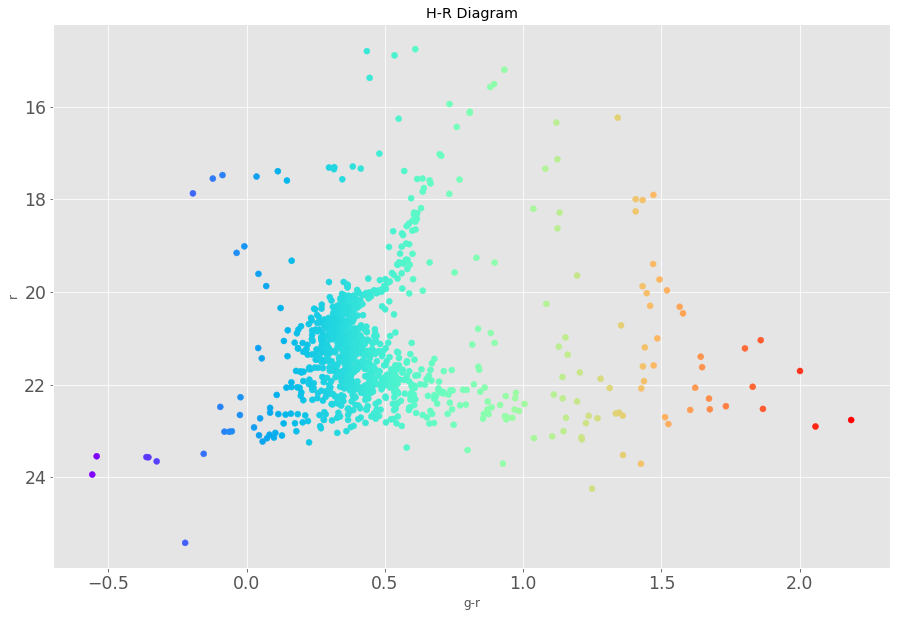

In [16]:
fig, ax = plt.subplots()

ax.scatter(sqlResult['g-r'], sqlResult['r'], c=sqlResult['g-r'], cmap='rainbow')

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

ax.set_xlabel('g-r')
ax.set_ylabel('r')

ax.set_title('H-R Diagram')

plt.show()

Question 12. Can you see the main sequence on this diagram? Can you see any of the giants and supergiants? If so, identify these groups of stars on your diagram.

## Conclusion

You have now seen H-R diagrams for many different star systems. H-R diagrams can tell you about the ages of star clusters. For instance, a cluster with a lot of blue giants is very young, because those stars burn out very quickly. A typical middle age cluster has most of its stars on the main sequence. An older cluster has a lot of red giants. As the cluster ages even further, you see an increasing number of white dwarf stars.

### Research Challenge

Find a cluster of stars that intrigues you. You may find a few others on SkyServer, but you should look at other data sources as well. Good places to look include the Hipparcos database, The Palomar Observatory Sky Survey, the Mulitmission Archive at Space Telescope, SIMBAD, or another data source you find online.

Create an H-R Diagram for your star cluster. Deduce as much as you can about the age and distance of the cluster by studying its stars.

E-mail us your conclusions, your H-R diagrams, and the data you used to make them. We'll look at all the projects we receive, and we'll put them up on these pages!